# Prediction of Chronic kidney disease

<b>1. Importing the dataset from csv that is downloaded from https://www.kaggle.com/mansoordaku/ckdisease</b>

In [1]:
import pandas as pd 
data = pd.read_csv("kidney_disease.csv") 

In [2]:
# Checking data-points and features

print(data.shape)
data.count()

(400, 26)


id                400
age               391
bp                388
sg                353
al                354
su                351
rbc               248
pc                335
pcc               396
ba                396
bgr               356
bu                381
sc                383
sod               313
pot               312
hemo              348
pcv               330
wc                295
rc                270
htn               398
dm                398
cad               398
appet             399
pe                399
ane               399
classification    400
dtype: int64

It is clearly visible that every column has missing values.(Count less than 400)

<b>2. Extracting X as all columns except the first column and Y as first column.</b>

In [3]:
X=data.drop('id',1)
Y=data.id

<b>3. Visualizing the dataset</b>

In [4]:
# Visualizing data
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# checking types of the columns
X.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
#Data exploration
X['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [7]:
# method to check categorial data and removing extra spacing from object datatype 
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        X[col_name]=X[col_name].str.strip()
        unique_cat=len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories ".format(col_name=col_name,unique_cat=unique_cat))

Feature 'rbc' has 3 unique categories 
Feature 'pc' has 3 unique categories 
Feature 'pcc' has 3 unique categories 
Feature 'ba' has 3 unique categories 
Feature 'pcv' has 44 unique categories 
Feature 'wc' has 91 unique categories 
Feature 'rc' has 50 unique categories 
Feature 'htn' has 3 unique categories 
Feature 'dm' has 3 unique categories 
Feature 'cad' has 3 unique categories 
Feature 'appet' has 3 unique categories 
Feature 'pe' has 3 unique categories 
Feature 'ane' has 3 unique categories 
Feature 'classification' has 2 unique categories 


In [8]:
# converting classification data to 0 or 1
X['classification']=[0 if x=='notckd' else 1 for x in X['classification']]
X['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

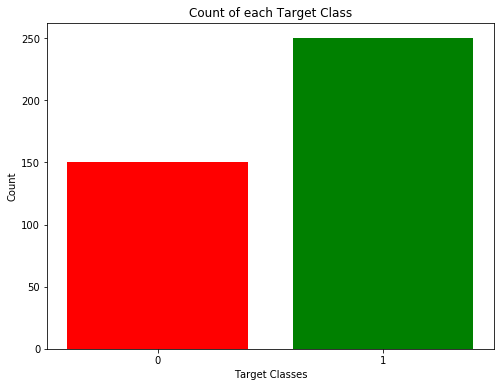

In [9]:
#Visualizing target data(BAR GRAPH)
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import numpy as np
%matplotlib inline

rcParams['figure.figsize'] = 8,6
plt.bar(X['classification'].unique(), X['classification'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')


In [10]:
# pcv,rc,htn are not categorial data as it is showing more unique values
# Replacing spaces and ? in data and converting it to numeric
X['rc']=pd.to_numeric((X['rc'].str.replace('?','')).str.strip())
X['pcv']=pd.to_numeric((X['pcv'].str.replace('?','')).str.strip())
X['wc']=pd.to_numeric((X['wc'].str.replace('?','')).str.strip())


In [11]:
# to handle missing values.Missing values are replaced by mean value
for col_name in X.columns:
    if X[col_name].dtypes == 'float64':
        print("Filling missing values with mean for Feature '{col_name}'".format(col_name=col_name))
        X[col_name]=X[col_name].fillna(X[col_name].mean())
        

Filling missing values with mean for Feature 'age'
Filling missing values with mean for Feature 'bp'
Filling missing values with mean for Feature 'sg'
Filling missing values with mean for Feature 'al'
Filling missing values with mean for Feature 'su'
Filling missing values with mean for Feature 'bgr'
Filling missing values with mean for Feature 'bu'
Filling missing values with mean for Feature 'sc'
Filling missing values with mean for Feature 'sod'
Filling missing values with mean for Feature 'pot'
Filling missing values with mean for Feature 'hemo'
Filling missing values with mean for Feature 'pcv'
Filling missing values with mean for Feature 'wc'
Filling missing values with mean for Feature 'rc'


In [12]:
todummy_List=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

def dummy_df(data,todummy_List):
    for x in todummy_List:
        dummies=pd.get_dummies(data[x],prefix=x,dummy_na=False)
        data=data.drop(x,1)
        data=pd.concat([data,dummies],axis=1)
    return data


In [13]:
X=dummy_df(X,todummy_List)
X.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
classification      int64
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_no               uint8
dm_yes              uint8
cad_no              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object

/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


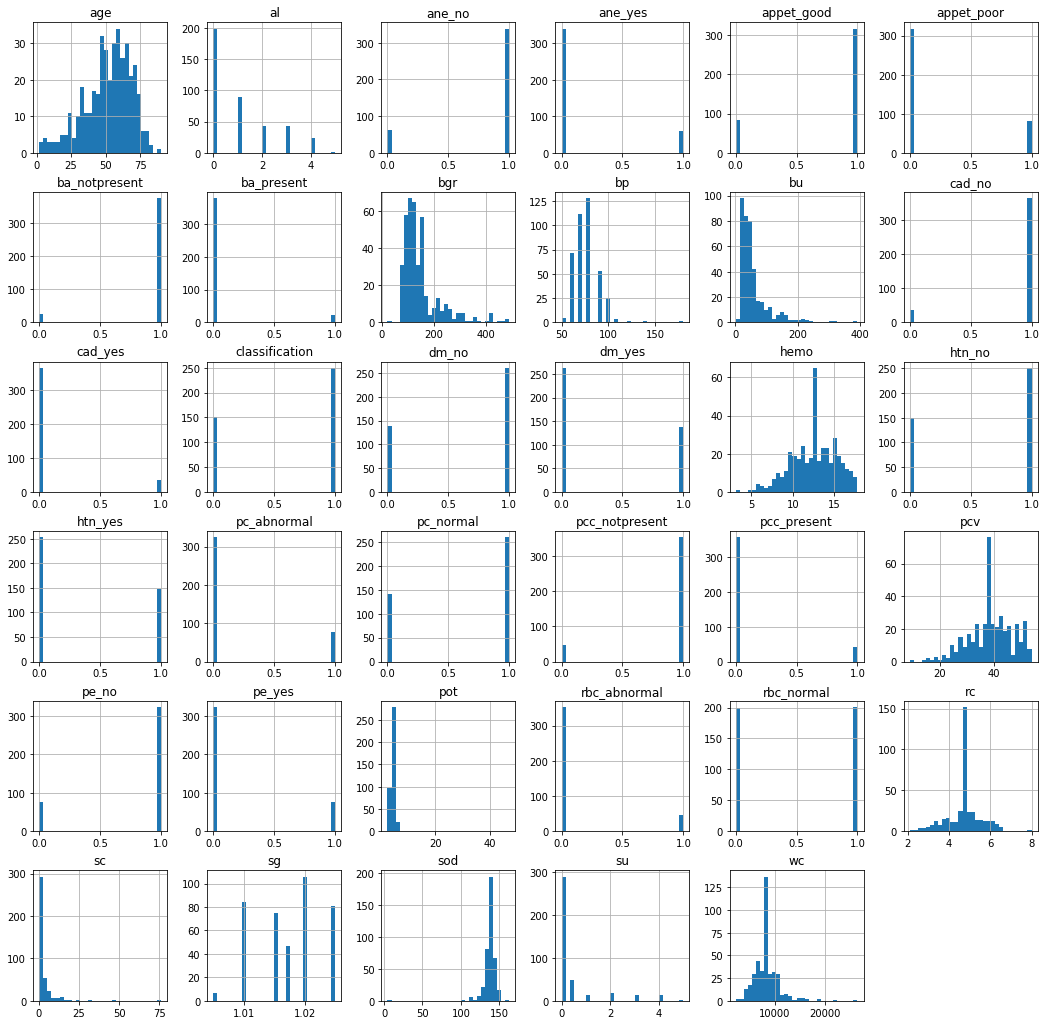

In [14]:
fig=plt.figure(figsize=(18,18))
ax=fig.gca()
X.hist(ax=ax,bins=30)
plt.show()

Text(0, 0.5, 'classification')

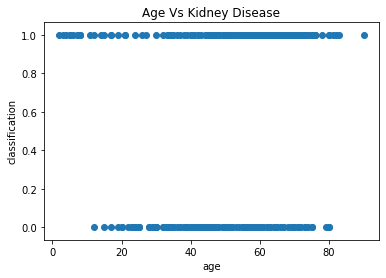

In [15]:

fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(X['age'], X['classification'])
# set a title and labels
ax.set_title('Age Vs Kidney Disease')
ax.set_xlabel('age')
ax.set_ylabel('classification')

<b>4. Split the data into training set and testing set.Perform 10-fold cross validation</b>

In [16]:
Y=X.classification
X=X.drop('classification',1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=0)

In [17]:
# 10-fold cross validation 
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state = 1, shuffle = True)

<b>5. Train a Logistic regression model for the dataset</b>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

# 10-fold cross validation accuracy
modelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(modelCV, X_train, Y_train, cv=kf, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

model = LogisticRegression(solver='liblinear', multi_class='auto',C=300)
accuracyArray=[]
for i, (train_index, test_index) in enumerate( kf.split(X)):
    # Create data for this fold
        y_train, y_valid = Y.iloc[train_index].copy(), Y.iloc[test_index]
        x_train, x_valid = X.iloc[train_index, :].copy(), X.iloc[test_index, :].copy()
        model = model.fit(x_train, y_train)
        y_pred = model.predict(x_valid)
        accuracyArray.append(metrics.accuracy_score(y_valid, y_pred))
    


Accuracy of logistic regression classifier on test set: 0.99
10-fold cross validation average accuracy: 0.986


/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

<b>6. Display the coefficients and form the logistic regression equation </b>

In [19]:
print(model.coef_,model.intercept_)

[[-3.59663903e-02  5.67351440e-02  9.08300319e-02  1.94673963e+00
   3.45710974e-01  4.47085020e-02 -2.66258577e-02  1.64565036e+00
   1.01055234e-01  2.38385266e-01 -1.12743147e+00 -1.16559332e-01
   7.74781934e-05 -6.48032564e-01  3.66521076e-01 -2.66633881e+00
   2.06746776e-01 -2.80559475e-01  1.46656690e-01  5.77752192e-02
   1.77665810e-01  2.67660989e-02 -6.93833730e-01  8.13666812e-01
  -7.43944970e-01  8.63778051e-01  8.09362026e-02  3.88968793e-02
  -4.24777627e-01  5.47815489e-01 -4.06267187e-01  5.29305048e-01
   9.02462916e-04  1.22135399e-01]] [0.11381505]


In [20]:
# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

In [21]:
degree = 2

In [22]:
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)

In [23]:
#the sigmoid function for logistic regression.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [24]:
def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 

In [25]:
# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

In [26]:
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, Y))

/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/b0201655/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [27]:
theta = res.x

<b>7. Compute the accuracy and confusion matrix</b>

In [28]:
print("Accuracy of Logistic regression",metrics.accuracy_score(Y_test, Y_pred)*100)
print("Accuracy of 10 Fold Cross Validation Logistic Regression",np.mean(accuracyArray)*100)
# confusion_matrix = confusion_matrix(y_valid, y_pred)
# print(confusion_matrix)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)


Accuracy of Logistic regression 99.16666666666667
Accuracy of 10 Fold Cross Validation Logistic Regression 99.0
[[48  0]
 [ 1 71]]


<b>8. Plot the decision boundary.</b>

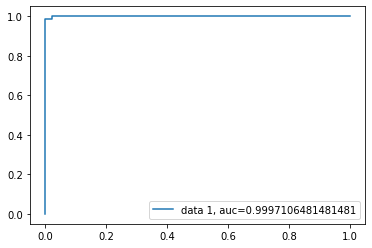

In [29]:
# Using matplotlib to plot the visualization
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
# fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [30]:
# define a function to plot the decision boundary
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['Healthy', 'Kidney Disease', 'Decision Boundary'])
    return cs

NameError: name 'pos' is not defined

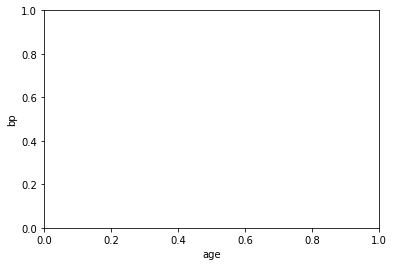

In [31]:
fig, axes = plt.subplots();
axes.set_xlabel('age')
axes.set_ylabel('bp')
axes.scatter(X.loc[pos, 'age'], X.loc[pos, 'bp'], color = 'r', marker='x', label='Kidney Disease')
axes.scatter(X.loc[neg, 'age'], X.loc[neg, 'bp'], color = 'g', marker='o', label='Healthy')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta, degree, axes)

<b>9. Create an output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).</b>

In [ ]:
df = pd.DataFrame(data={"Actual": y_valid, "Predicted": y_pred})
df.to_csv("./output.csv", sep=',',index=False)